<a href="https://colab.research.google.com/github/lmeng/deep_learning_code/blob/master/CNN/Exercise4_CNN_(data_generator).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [1]:
import tensorflow as tf
import os
import zipfile

DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

--2019-12-23 03:58:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-12-23 03:58:14 (167 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [2]:
!ls /tmp/h-or-s/happy

happy1-00.png  happy1-08.png  happy1-16.png  happy2-04.png  happy2-12.png
happy1-01.png  happy1-09.png  happy1-17.png  happy2-05.png  happy2-13.png
happy1-02.png  happy1-10.png  happy1-18.png  happy2-06.png  happy2-14.png
happy1-03.png  happy1-11.png  happy1-19.png  happy2-07.png  happy2-15.png
happy1-04.png  happy1-12.png  happy2-00.png  happy2-08.png  happy2-16.png
happy1-05.png  happy1-13.png  happy2-01.png  happy2-09.png  happy2-17.png
happy1-06.png  happy1-14.png  happy2-02.png  happy2-10.png  happy2-18.png
happy1-07.png  happy1-15.png  happy2-03.png  happy2-11.png  happy2-19.png


In [3]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory('/tmp/h-or-s', target_size=(150, 150), batch_size=10, class_mode='binary')
# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


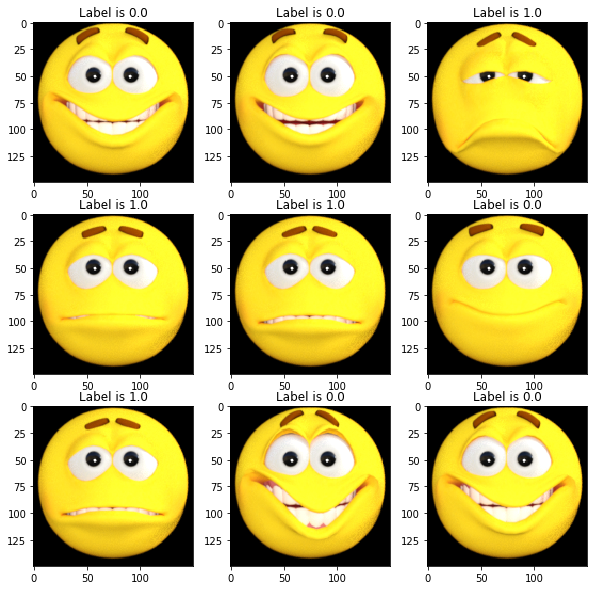

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
for i, x in enumerate(train_generator):
  if i == 9:
    break
  plt.subplot(3,3,i+1)
  img = x[0][1].astype(int)
  target = x[1][1]
  plt.imshow(img)
  plt.title('Label is {label}'.format(label=target))
plt.show()

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>DESIRED_ACCURACY):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [6]:
# This Code Block should Define and Compile the Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
  Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
  MaxPooling2D(2,2),
  Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(2,2),
  Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
  Flatten(),
  Dense(512, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.compile(
  loss='binary_crossentropy',
  optimizer=RMSprop(lr=0.001),
  metrics=['accuracy']
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [8]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(train_generator, callbacks=[callbacks], epochs=10)

# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/10
8/8 [==============================] - 4s 495ms/step - loss: 1481.0006 - acc: 0.6125
Epoch 2/10
8/8 [==============================] - 3s 361ms/step - loss: 32.1074 - acc: 0.7250
Epoch 3/10
7/8 [=========================>....] - ETA: 0s - loss: 2.0013e-12 - acc: 1.0000
Reached 99% accuracy so cancelling training!
8/8 [==============================] - 3s 358ms/step - loss: 1.7512e-12 - acc: 1.0000
